## KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

LSTMのサンプルコード

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

ConvLSTM2Dのサンプルコード

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, SimpleRNN, GRU, ConvLSTM2D
from tensorflow.keras.datasets import imdb

In [2]:
max_features = 30000
# cut texts after this number of words (among top max_features most common words)
maxlen = 300
batch_size = 64

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, truncating='post')
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, truncating='post')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 300)
x_test shape: (25000, 300)


#### SimpleRNN

In [3]:
x = Input(shape=(None,), name='input')
embedding = Embedding(input_dim=max_features,
                      output_dim=400,
                      name='embedding'
                     )(x)
rnn = SimpleRNN(maxlen, name='SimpleRNN')(embedding)
y = Dense(1, activation='sigmoid')(rnn)

model = Model(inputs=x, outputs=y)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 88s 4ms/sample - loss: 0.6887 - accuracy: 0.5426 - val_loss: 0.7191 - val_accuracy: 0.5038
Epoch 2/15
25000/25000 [==============================] - 89s 4ms/sample - loss: 0.6139 - accuracy: 0.6536 - val_loss: 0.6327 - val_accuracy: 0.6315
Epoch 3/15
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.4935 - accuracy: 0.7583 - val_loss: 0.5938 - val_accuracy: 0.6948
Epoch 4/15
25000/25000 [==============================] - 91s 4ms/sample - loss: 0.4325 - accuracy: 0.7941 - val_loss: 0.6484 - val_accuracy: 0.6915
Epoch 5/15
25000/25000 [==============================] - 91s 4ms/sample - loss: 0.3600 - accuracy: 0.8436 - val_loss: 0.6718 - val_accuracy: 0.6776
Epoch 6/15
25000/25000 [==============================] - 89s 4ms/sample - loss: 0.4236 - accuracy: 0.7900 - val_loss: 0.6578 - val_accuracy: 0.5960
Epoch 7/15
25000/25000 [==============================] 

#### GRU

In [4]:
x = Input(shape=(None,), name='input')
embedding = Embedding(input_dim=max_features,
                      output_dim=400,
                      name='embedding'
                     )(x)
rnn = GRU(maxlen, name='GRU')(embedding)
y = Dense(1, activation='sigmoid')(rnn)

model = Model(inputs=x, outputs=y)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 72s 3ms/sample - loss: 0.5039 - accuracy: 0.7554 - val_loss: 0.4103 - val_accuracy: 0.8341
Epoch 2/15
25000/25000 [==============================] - 70s 3ms/sample - loss: 0.2469 - accuracy: 0.9026 - val_loss: 0.3211 - val_accuracy: 0.8709
Epoch 3/15
25000/25000 [==============================] - 71s 3ms/sample - loss: 0.1213 - accuracy: 0.9571 - val_loss: 0.3824 - val_accuracy: 0.8629
Epoch 4/15
25000/25000 [==============================] - 71s 3ms/sample - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.5094 - val_accuracy: 0.8414
Epoch 5/15
25000/25000 [==============================] - 71s 3ms/sample - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.5935 - val_accuracy: 0.8508
Epoch 6/15
25000/25000 [==============================] - 71s 3ms/sample - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.6708 - val_accuracy: 0.8450
Epoch 7/15
25000/25000 [==============================] 

#### LSTM

In [5]:
x = Input(shape=(None,), name='input')
embedding = Embedding(input_dim=max_features,
                      output_dim=400,
                      name='embedding'
                     )(x)
rnn = LSTM(maxlen, name='LSTM')(embedding)
y = Dense(1, activation='sigmoid')(rnn)

model = Model(inputs=x, outputs=y)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 79s 3ms/sample - loss: 0.5029 - accuracy: 0.7516 - val_loss: 0.4059 - val_accuracy: 0.8389
Epoch 2/15
25000/25000 [==============================] - 77s 3ms/sample - loss: 0.2866 - accuracy: 0.8884 - val_loss: 0.3795 - val_accuracy: 0.8428
Epoch 3/15
25000/25000 [==============================] - 77s 3ms/sample - loss: 0.1737 - accuracy: 0.9365 - val_loss: 0.4388 - val_accuracy: 0.8400
Epoch 4/15
25000/25000 [==============================] - 77s 3ms/sample - loss: 0.1391 - accuracy: 0.9479 - val_loss: 0.4897 - val_accuracy: 0.8405
Epoch 5/15
25000/25000 [==============================] - 77s 3ms/sample - loss: 0.0609 - accuracy: 0.9797 - val_loss: 0.6160 - val_accuracy: 0.8150
Epoch 6/15
25000/25000 [==============================] - 77s 3ms/sample - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.7038 - val_accuracy: 0.8368
Epoch 7/15
25000/25000 [==============================] 

#### サンプルコードをそのまま実行

In [8]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.4609 - accuracy: 0.7848 - val_loss: 0.3793 - val_accuracy: 0.8345
Epoch 2/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.3087 - accuracy: 0.8758 - val_loss: 0.3903 - val_accuracy: 0.8310
Epoch 3/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.2195 - accuracy: 0.9149 - val_loss: 0.4224 - val_accuracy: 0.8306
Epoch 4/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.1695 - accuracy: 0.9378 - val_loss: 0.4604 - val_accuracy: 0.8267
Epoch 5/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.1179 - accuracy: 0.9584 - val_loss: 0.6142 - val_accuracy: 0.8260
Epoch 6/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.0902 - accuracy: 0.9688 - val_loss: 0.5755 - val_accuracy: 0.8134
Epoch 7/15
25000/25000 [==============================] - 40s 2ms/st

#### ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/30
950/950 [==============================] - 59s 62ms/step - loss: 0.2263 - val_loss: 0.7688
Epoch 2/30
950/950 [==============================] - 55s 58ms/step - loss: 0.0330 - val_loss: 0.2918
Epoch 3/30
950/950 [==============================] - 55s 58ms/step - loss: 0.0060 - val_loss: 0.2830
Epoch 4/30
950/950 [==============================] - 55s 58ms/step - loss: 0.0022 - val_loss: 0.3551
Epoch 5/30
950/950 [==============================] - 54s 57ms/step - loss: 9.6123e-04 - val_loss: 0.2307
Epoch 6/30
950/950 [==============================] - 55s 58ms/step - loss: 6.6794e-04 - val_loss: 0.0373
Epoch 7/30
950/950 [==============================] - 55s 58ms/step - loss: 5.3895e-04 - val_loss: 0.0015
Epoch 8/30
950/950 [==============================] - 56s 59ms/step - loss: 4.5902e-04 - val_loss: 5.0274e-04
Epoch 9/30
950/950 [==============================] - 56s 59ms/step - loss: 4.0384e-04 - val_loss: 5.7916e-04
Epoch 10/

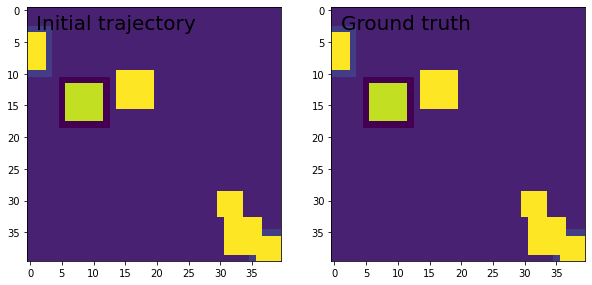

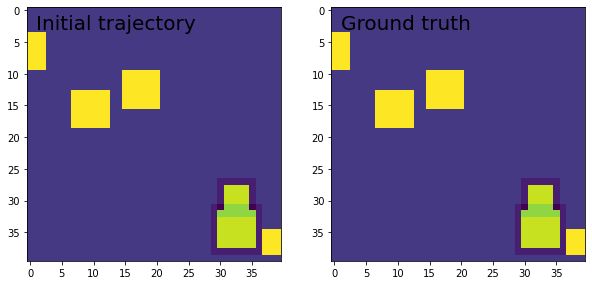

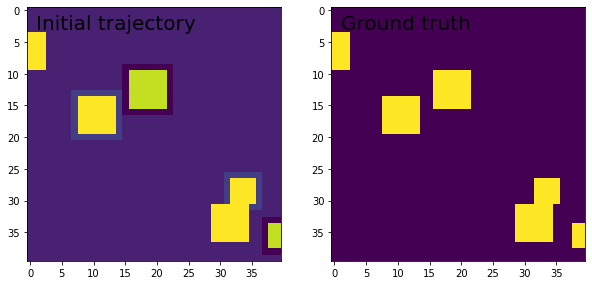

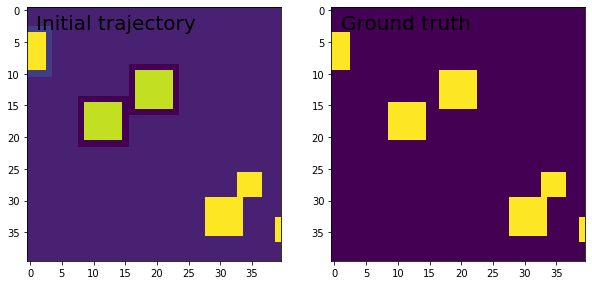

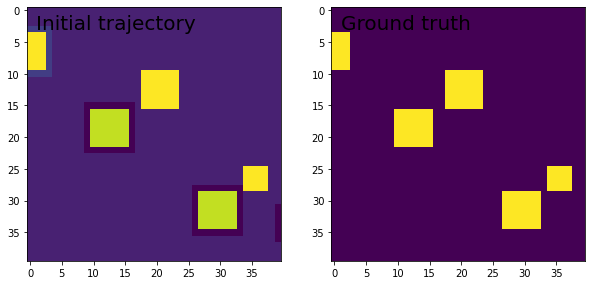

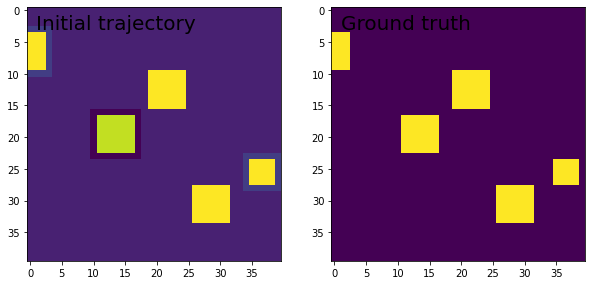

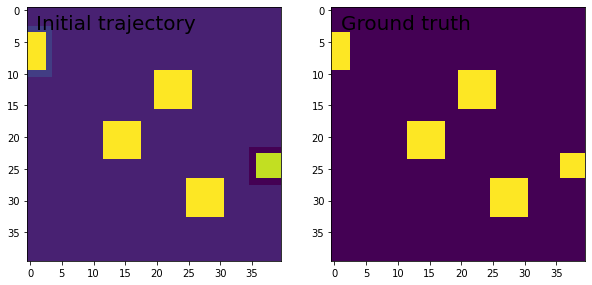

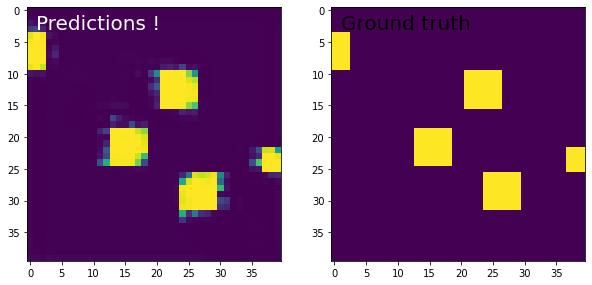

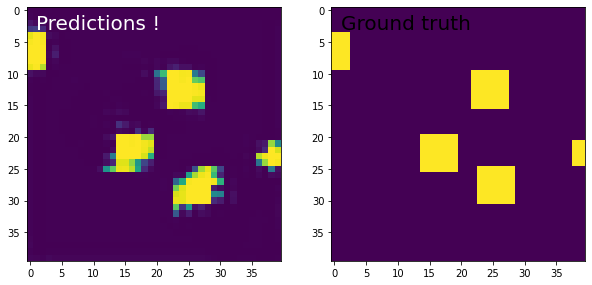

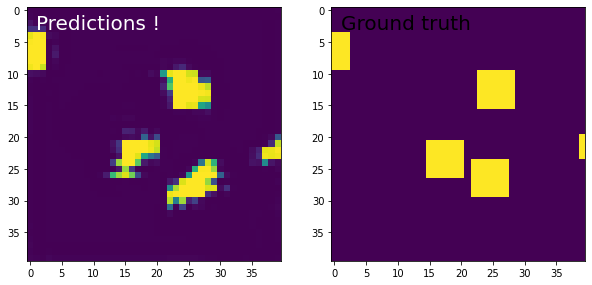

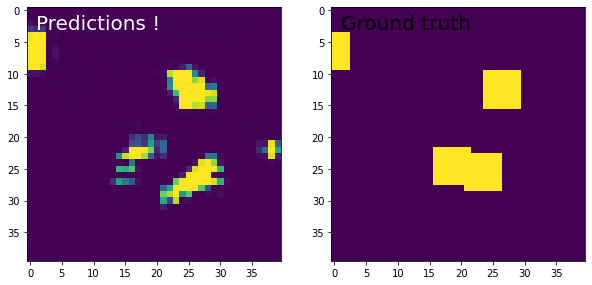

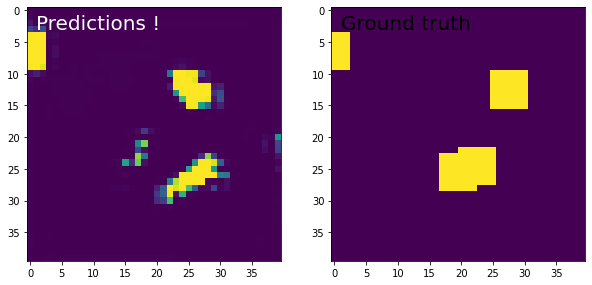

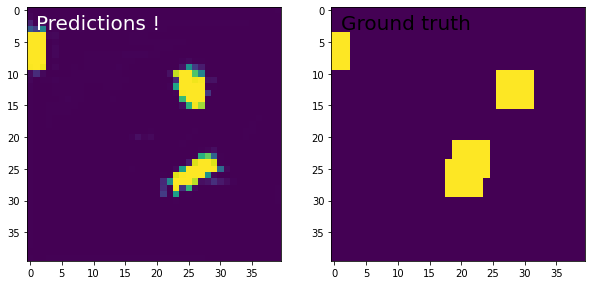

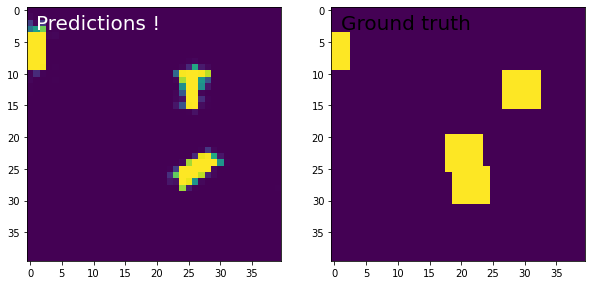

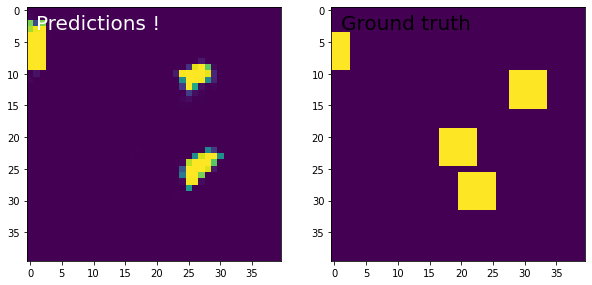

In [9]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=30, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

学習が足りないのか、経った時間が長い予測ほど正方形を上手く描画してくれない。右にある小さい四角が画面外に出る動きは再現できているように見える。

### 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

#### 回答なし

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

#### RNN
引数にRNNレイヤセルのインスタンスを渡すことでRNNモデルを構築できるクラス。

#### SimpleRNNCell
RNNを時系列方向に構築しているセルの1単位。RNNに渡すことでSimpleRNNを構築できる。

#### GRUCell
GRUを時系列方向に構築しているセルの1単位。RNNに渡すことでGRUを構築できる。

#### LSTMCell
LSTMを時系列方向に構築しているセルの1単位。RNNに渡すことでLSTMを構築できる。

#### StackedRNNCells
RNNインスタンスのリストを渡すことでRNNの階層を増やすことができる。
最終的に、返り値をRNNで渡すことでモデルを構築する。

#### CuDNNGRU
NVIDIACUDA®ディープニューラルネットワークライブラリ（cuDNN）を使用して交差校に動作するGRUレイヤ。

#### CuDNNLSTM
NVIDIACUDA®ディープニューラルネットワークライブラリ（cuDNN）を使用して交差校に動作するLSTMレイヤ。

In [14]:
from tensorflow.keras.layers import RNN,SimpleRNNCell,GRUCell,LSTMCell,StackedRNNCells

RNN(SimpleRNNCell(1, activation=None), input_shape=(None, 1), return_sequences=True)
RNN(GRUCell(1, activation=None), input_shape=(None, 1), return_sequences=True)
RNN(LSTMCell(1, activation=None), input_shape=(None, 1), return_sequences=True)